TF-IDF : It is a measure of originality of a word by comparing the number of times a word appears in a doc with the number of docs the word appears in.

TF - IDF = TF(t,d) * IDF(t)

- t = Term of Frequency(Number of time term t appears in a doc d
- IDF = Inverse Document Frequency = Log(1+n)/1+df(d,t)
- n: Number of documents
- t: Document frequency of term t

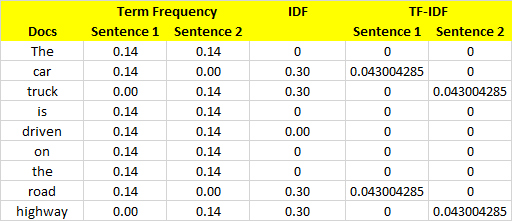

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel

In [2]:
#Loading data
credits = pd.read_csv('C:/Users/Bhavi/Desktop/Data Science/Data/Recommender System/tmdb_5000_credits.csv')
movies = pd.read_csv('C:/Users/Bhavi/Desktop/Data Science/Data/Recommender System/tmdb_5000_movies.csv')

In [3]:
#Checking the credits data
display(credits.head(3))

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [4]:
#Checking the movies data
display(movies.head(2))

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [5]:
#Checking the shape of the data
credits.shape, movies.shape

((4803, 4), (4803, 20))

In [6]:
#Changing the name of movie_id to id
credits = credits.rename(index=str, columns={'movie_id':'id'})

In [7]:
#Merging both both
data = movies.merge(credits, on = 'id')

In [8]:
#Selecting important features and drop it rest
data = data[['id','original_title','overview','genres',]]

In [9]:
#Checking data
data.head(2)

,id,original_title,overview,genres
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."


In [10]:
#Checking data
data.head(2)

,id,original_title,overview,genres
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."


In [11]:
#Checking data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              4803 non-null   int64 
 1   original_title  4803 non-null   object
 2   overview        4800 non-null   object
 3   genres          4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 187.6+ KB


In [12]:
#Checking example of overview
data['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [13]:
#Checking missing values
data['overview'][data['overview'].isnull()]

2656    NaN
4140    NaN
4431    NaN
Name: overview, dtype: object

In [14]:
#Replacing missing values 
data['overview'] = data['overview'].fillna('')

In [15]:
#Checking missing values
data['overview'][data['overview'].isnull()]

Series([], Name: overview, dtype: object)

In [16]:
#Convert a collection of raw documents to a matrix of Term Frequency-Inverse Document Frequency features
tfv = TfidfVectorizer(min_df=3, #Minimum document frequency
                      max_features=None, 
                      strip_accents='unicode', 
                      analyzer= 'word', 
                      token_pattern='\w{1,}',
                      ngram_range = (1,3), 
                      stop_words = 'english')

In [17]:
#Creating term frequency vector matrix
tfv_matrix = tfv.fit_transform(data['overview'])

In [38]:
#Checking term frequency vector matrix
print(tfv_matrix[1])

  (0, 1810)	0.36793229072333994
  (0, 7159)	0.3031029042939378
  (0, 2916)	0.30082125582474917
  (0, 9609)	0.3355175975086389
  (0, 2848)	0.21556897928560054
  (0, 2872)	0.3232482593626707
  (0, 4205)	0.30803003793564465
  (0, 5263)	0.1333016217342793
  (0, 1806)	0.2104623271234315
  (0, 2318)	0.21892404835497967
  (0, 973)	0.31978263582772976
  (0, 5397)	0.2177787376297125
  (0, 1408)	0.2533122207710996


In [25]:
#Checking the shape of term frequency vector matrix
tfv_matrix.shape

(4803, 10417)

In [45]:
#Creating sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [27]:
#Checking sigmoid kernel data
sig[0:5]

array([[0.76163447, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
        0.76159416],
       [0.76159416, 0.76163447, 0.76159416, ..., 0.76159513, 0.76159416,
        0.76159416],
       [0.76159416, 0.76159416, 0.76163447, ..., 0.76159486, 0.76159416,
        0.76159455],
       [0.76159506, 0.76159416, 0.76159441, ..., 0.76159558, 0.76159573,
        0.76159616],
       [0.76159416, 0.76159579, 0.76159442, ..., 0.76159463, 0.76159416,
        0.7615949 ]])

In [40]:
#Creating indices
indices = pd.Series(data.index, index = data['original_title']).drop_duplicates()
indices

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [41]:
#Extracting an index number of given movies search
idx = indices['Spectre']
idx

2

In [42]:
#Extracting sigmoid values list
sig_scores = list(enumerate(sig[2]))
sig_scores

[(0, 0.7615941559557649),
 (1, 0.7615941559557649),
 (2, 0.7616344692549826),
 (3, 0.7615944078290156),
 (4, 0.7615944213582981),
 (5, 0.7615942634061001),
 (6, 0.7615945730022298),
 (7, 0.7615955714806975),
 (8, 0.7615951306677612),
 (9, 0.7615944907448964),
 (10, 0.7615941559557649),
 (11, 0.7616025118191588),
 (12, 0.7615941559557649),
 (13, 0.7615941559557649),
 (14, 0.7615941559557649),
 (15, 0.7615941559557649),
 (16, 0.7615942810266421),
 (17, 0.761596443626416),
 (18, 0.7615951940341736),
 (19, 0.7615943775270628),
 (20, 0.7615942420476589),
 (21, 0.7615946763018908),
 (22, 0.7615941559557649),
 (23, 0.761595188449907),
 (24, 0.7615941559557649),
 (25, 0.7615941559557649),
 (26, 0.7615941559557649),
 (27, 0.7615943432582309),
 (28, 0.7615941559557649),
 (29, 0.7616032475573522),
 (30, 0.7615942693045328),
 (31, 0.7615943411868855),
 (32, 0.7615941559557649),
 (33, 0.7615943274938118),
 (34, 0.7615941559557649),
 (35, 0.761596996412033),
 (36, 0.7615948873479584),
 (37, 0.761594

In [ ]:
#Sorting only values
sig_scores = sorted(sig_scores, key = lambda x:x[1], reverse=True)
sig_scores

In [45]:
#Extracting first 10 scores
sig_scores = sig_scores[1:11]
sig_scores

[(1343, 0.7616038345476555),
 (29, 0.7616032475573522),
 (3162, 0.7616031466748028),
 (4071, 0.761602857625916),
 (11, 0.7616025118191588),
 (3351, 0.7616006043795629),
 (1717, 0.7616000286649154),
 (4009, 0.7616000134129446),
 (1200, 0.7616000047378374),
 (4339, 0.7615999170411694)]

In [46]:
#Extracting index of sig scores
movies_indices = [i[0] for i in sig_scores]
movies_indices

[1343, 29, 3162, 4071, 11, 3351, 1717, 4009, 1200, 4339]

In [47]:
#Showing results
data['original_title'].iloc[movies_indices]

1343          Never Say Never Again
29                          Skyfall
3162                    Thunderball
4071          From Russia with Love
11                Quantum of Solace
3351    The Man with the Golden Gun
1717                     Safe Haven
4009          2016: Obama's America
1200           The Living Daylights
4339                         Dr. No
Name: original_title, dtype: object

In [51]:
#Creating function for recommender system
def give_rec(title, sig=sig):
  idx = indices[title] #Extracting an index number of given movies search
  sig_scores = list(enumerate(sig[idx]))#Extracting sigmoid values list
  sig_scores = sorted(sig_scores, key = lambda x:x[1], reverse=True) #Sorting only values
  sig_scores = sig_scores[1:11] #Extracting first 10 scores
  movies_indices = [i[0] for i in sig_scores] #Extracting index of sig scores
  return data['original_title'].iloc[movies_indices] #Showing results

In [53]:
#Testing recommender engine
give_rec('Titanic')

1269                                  Raise the Titanic
2289                                         The Switch
296                                         End of Days
2287                         I Can Do Bad All By Myself
2143                                         Ghost Ship
4287                                            Niagara
171     Master and Commander: The Far Side of the World
4035                                              Stung
4228                        The Ballad of Jack and Rose
104                                            Poseidon
Name: original_title, dtype: object